In [16]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [17]:
#generating datas
x, y = make_blobs(n_samples=300, centers=4, random_state=42)


In [18]:
#intililizing centroids
def initialize_centroids(x, k):
    np.random.seed(42)
    random_indices = np.random.choice(len(x), size=k, replace=False)
    return x[random_indices]


In [19]:
#assigning
def assign_points_to_centroids(x, centroids):
    distances = np.linalg.norm(x[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)


In [20]:
#updating centroids
def update_centroids(x, labels, k):
    new_centroids = np.array([x[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids


In [21]:
#k-means cluster
def kmeans(x, k, max_iters=100):
    centroids = initialize_centroids(x, k)
    for _ in range(max_iters):
        labels = assign_points_to_centroids(x, centroids)
        new_centroids = update_centroids(x, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels


In [22]:
#running k maens alogoruithm
centroids, labels = kmeans(x, k=4)


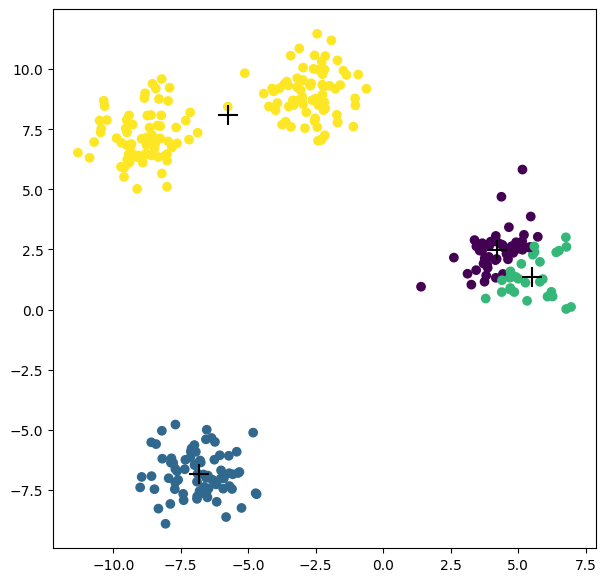

In [23]:
#plotting
plt.figure(figsize=(7,7))
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap="viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", s=200, marker='+')
plt.show()
